In [1]:
!pip install fastai==1.0.61

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.2/239.2 kB 5.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 16.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=7a337af54cfdff6a84eeffe1c0a8103f78134716e2d84857a857be6888856a6a
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.7.12
    Uninstalling fastai-2.7.12:
      Successfully uninstalled fastai-2.7.12


In [2]:
from fastai import *
from fastai.vision import *
from fastai.imports import *
from fastai.metrics import error_rate
#from fastai.vision.all import *
import os
import pandas as pd
import numpy as np

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
dt  = "/kaggle/input/breast-histopathology-images"
path = Path(dt)
pattern= r'([^/_]+).png$'
fnames=get_files(path, recurse=True)
#tfms=aug_transforms(flip_vert=True, max_warp=0., max_zoom=0., max_rotate=0.)
tfms=get_transforms(flip_vert=True, max_warp=0., max_zoom=0., max_rotate=0.)
path.ls()

[PosixPath('/kaggle/input/breast-histopathology-images/10295'),
 PosixPath('/kaggle/input/breast-histopathology-images/10304'),
 PosixPath('/kaggle/input/breast-histopathology-images/12868'),
 PosixPath('/kaggle/input/breast-histopathology-images/10274'),
 PosixPath('/kaggle/input/breast-histopathology-images/12818'),
 PosixPath('/kaggle/input/breast-histopathology-images/14190'),
 PosixPath('/kaggle/input/breast-histopathology-images/12869'),
 PosixPath('/kaggle/input/breast-histopathology-images/9323'),
 PosixPath('/kaggle/input/breast-histopathology-images/10291'),
 PosixPath('/kaggle/input/breast-histopathology-images/12906'),
 PosixPath('/kaggle/input/breast-histopathology-images/9176'),
 PosixPath('/kaggle/input/breast-histopathology-images/8984'),
 PosixPath('/kaggle/input/breast-histopathology-images/10299'),
 PosixPath('/kaggle/input/breast-histopathology-images/12930'),
 PosixPath('/kaggle/input/breast-histopathology-images/9344'),
 PosixPath('/kaggle/input/breast-histopathol

In [4]:
np.random.seed(40)
data = ImageDataBunch.from_name_re(path, fnames, pattern, ds_tfms=tfms, size=50, bs=64,num_workers=4).normalize()

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


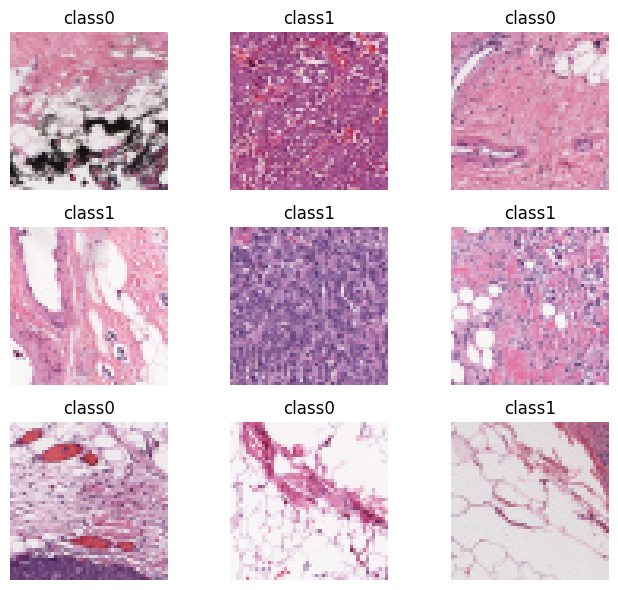

In [5]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [6]:
print(data.classes)
len(data.classes)
data.c

['class0', 'class1']


2

In [7]:
data

ImageDataBunch;

Train: LabelList (444039 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: CategoryList
class0,class0,class0,class0,class0
Path: /kaggle/input/breast-histopathology-images;

Valid: LabelList (111009 items)
x: ImageList
Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50),Image (3, 50, 50)
y: CategoryList
class0,class0,class0,class0,class0
Path: /kaggle/input/breast-histopathology-images;

Test: None

In [8]:
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path('../kaggle/working'),path = Path("."))

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 62.4MB/s]


epoch,train_loss,valid_loss,accuracy,time


/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


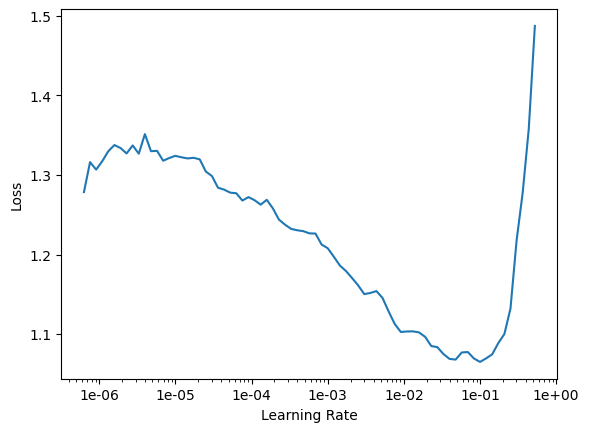

In [9]:
learn.lr_find()
learn.recorder.plot(suggestions=True)


In [10]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(1,slice(lr1,lr2))


epoch,train_loss,valid_loss,accuracy,time
0,0.308451,0.522563,0.878676,20:02


In [11]:
lr = 1e-1
learn.fit_one_cycle(1,slice(lr))

epoch,train_loss,valid_loss,accuracy,time
0,0.304298,1.432546,0.872461,12:59


epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,0.274261,0.493967,0.890396,13:26


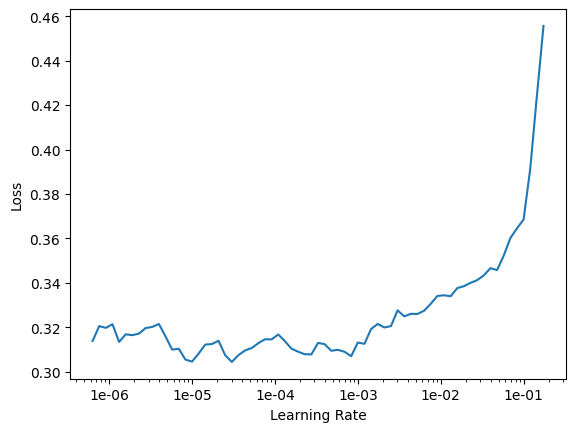

In [12]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1,slice(1e-4,1e-3))


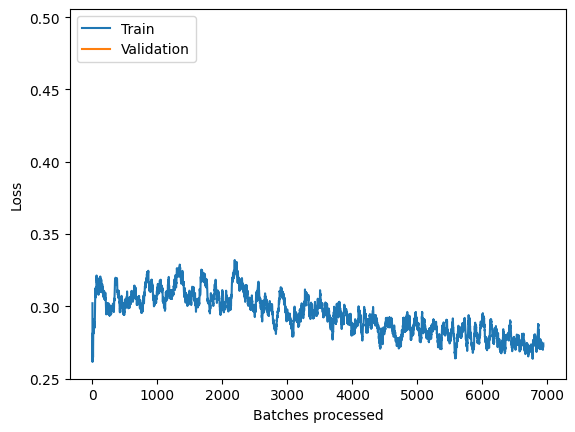

In [13]:
learn.recorder.plot_losses()

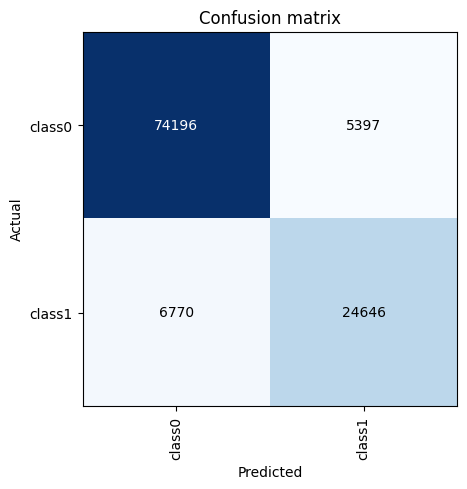

In [14]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


In [15]:
learn.export()
learn.model_dir = "/kaggle/working"
learn.save("stage-1",return_path=True)

PosixPath('/kaggle/working/stage-1.pth')

In [16]:
preds,y, loss = learn.get_preds(with_loss=True)
# get accuracy
acc = accuracy(preds, y)
print('The accuracy is {0} %.'.format(acc))

/opt/conda/lib/python3.10/site-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


The accuracy is 0.8903962969779968 %.


In [17]:
from random import randint

def plot_overview(interp:ClassificationInterpretation, classes=['Negative','Tumor']):
    # top losses will return all validation losses and indexes sorted by the largest first
    tl_val,tl_idx = interp.top_losses()
    #classes = interp.data.classes
    fig, ax = plt.subplots(3,4, figsize=(16,12))
    fig.suptitle('Predicted / Actual / Loss',fontsize=20)
    # Random
    for i in range(4):
        random_index = randint(0,len(tl_idx))
        idx = tl_idx[random_index]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        im = image2np(im.data)
        cl = int(cl)
        ax[0,i].imshow(im)
        ax[0,i].set_xticks([])
        ax[0,i].set_yticks([])
        ax[0,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f}')
    ax[0,0].set_ylabel('Random samples', fontsize=16, rotation=0, labelpad=80)
    # Most incorrect or top losses
    for i in range(4):
        idx = tl_idx[i]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        im = image2np(im.data)
        ax[1,i].imshow(im)
        ax[1,i].set_xticks([])
        ax[1,i].set_yticks([])
        ax[1,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f}')
    ax[1,0].set_ylabel('Most incorrect\nsamples', fontsize=16, rotation=0, labelpad=80)
    # Most correct or least losses
    for i in range(4):
        idx = tl_idx[len(tl_idx) - i - 1]
        im,cl = interp.data.dl(DatasetType.Valid).dataset[idx]
        cl = int(cl)
        im = image2np(im.data)
        ax[2,i].imshow(im)
        ax[2,i].set_xticks([])
        ax[2,i].set_yticks([])
        ax[2,i].set_title(f'{classes[interp.pred_class[idx]]} / {classes[cl]} / {interp.losses[idx]:.2f}')
    ax[2,0].set_ylabel('Most correct\nsamples', fontsize=16, rotation=0, labelpad=80)

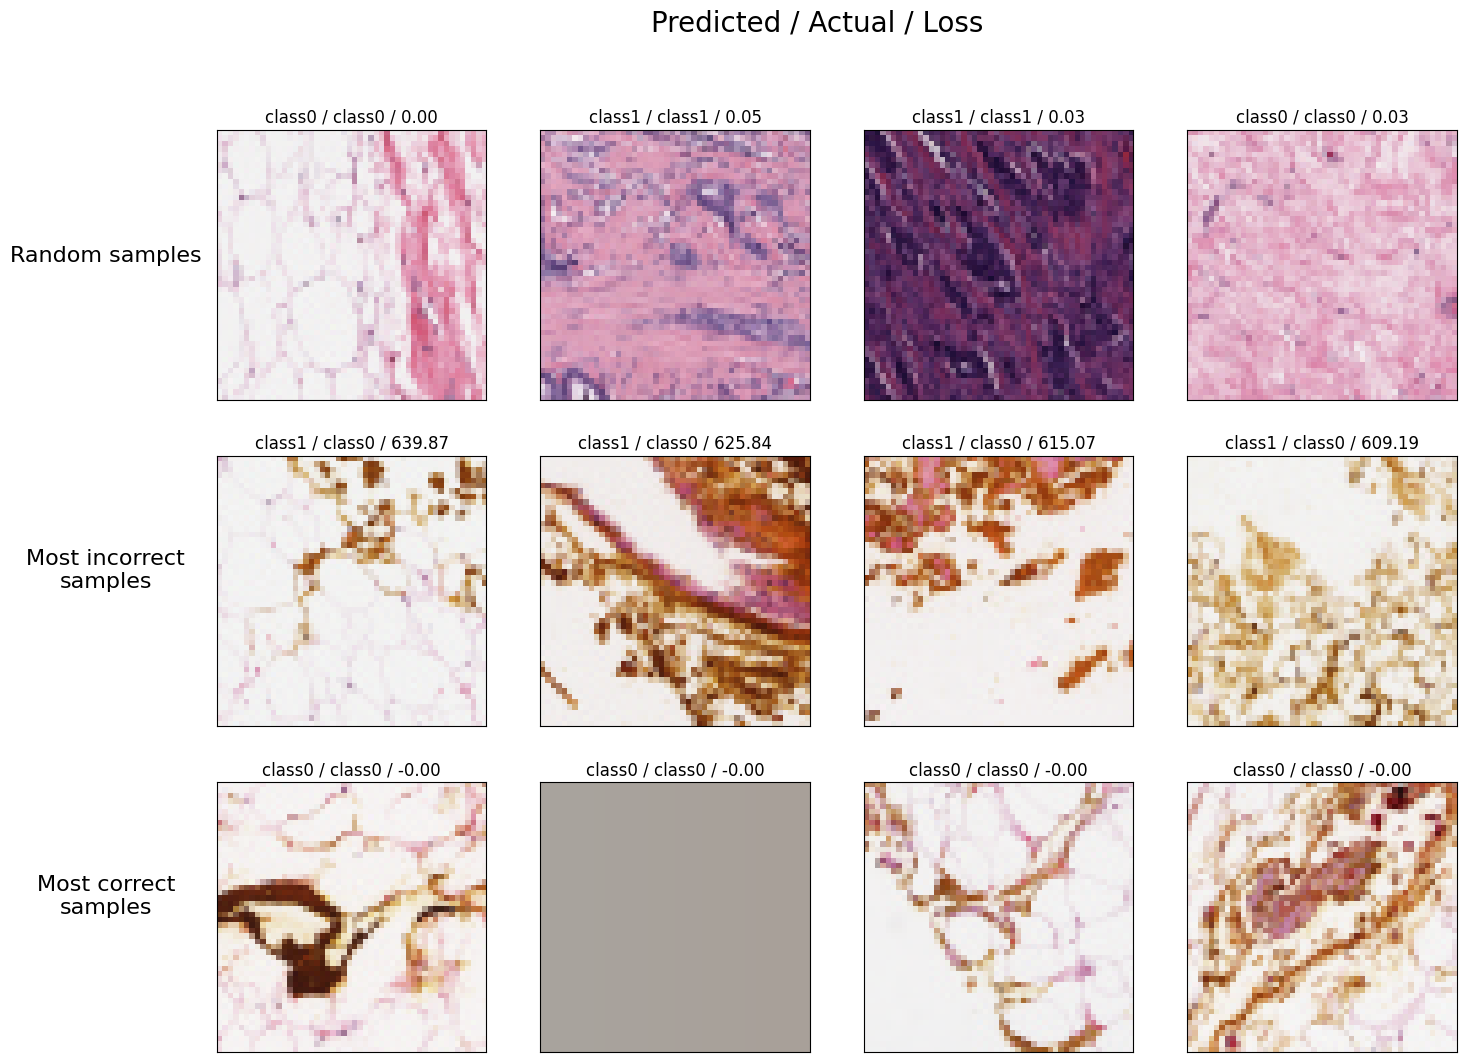

In [18]:
plot_overview(interp, ['class0','class1'])

In [19]:
from sklearn.metrics import roc_curve, auc
# probs from log preds
probs = np.exp(preds[:,1])
# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y, probs, pos_label=1)

# Compute ROC area
roc_auc = auc(fpr, tpr)
print('ROC area is {0}'.format(roc_auc))

ROC area is 0.9454427920955424


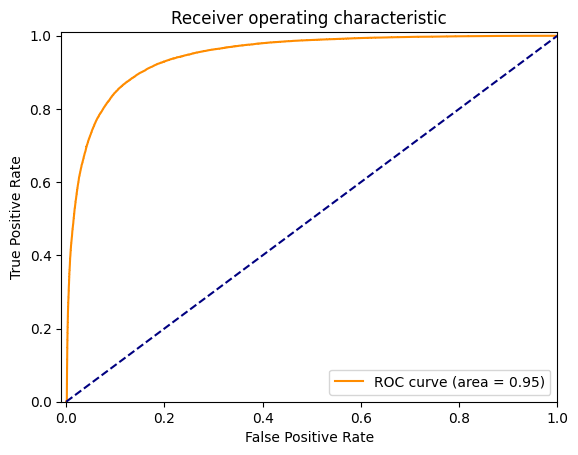

In [20]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")